In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [73]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
# Show dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                      

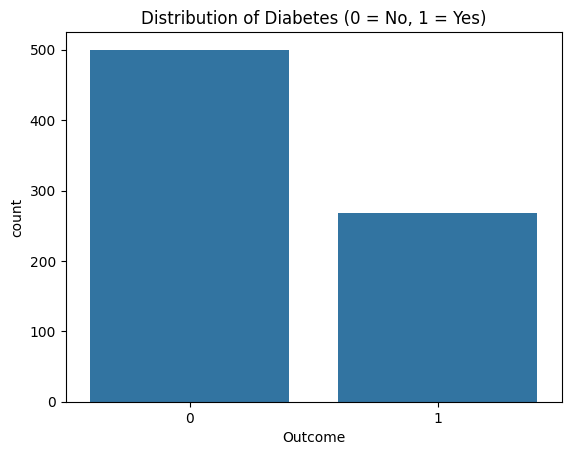

In [75]:
# Class distribution
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Diabetes (0 = No, 1 = Yes)")
plt.show()

In [76]:
#replace 0 values with NaN in the following columns 
cols_with_zeros= ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[cols_with_zeros] = df[cols_with_zeros].replace(0,np.nan)

In [77]:
df.fillna(df.median(), inplace=True)

In [78]:
# Ensure no remaining zeroes in those columns (optional check)
for col in cols_with_zeros:
    df[col] = df[col].apply(lambda x: df[col].median() if x == 0 else x)

# Feature Engineering: Create new feature

In [79]:
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1


In [80]:
df['BMI_Age'] = df['BMI'] * df['Age']

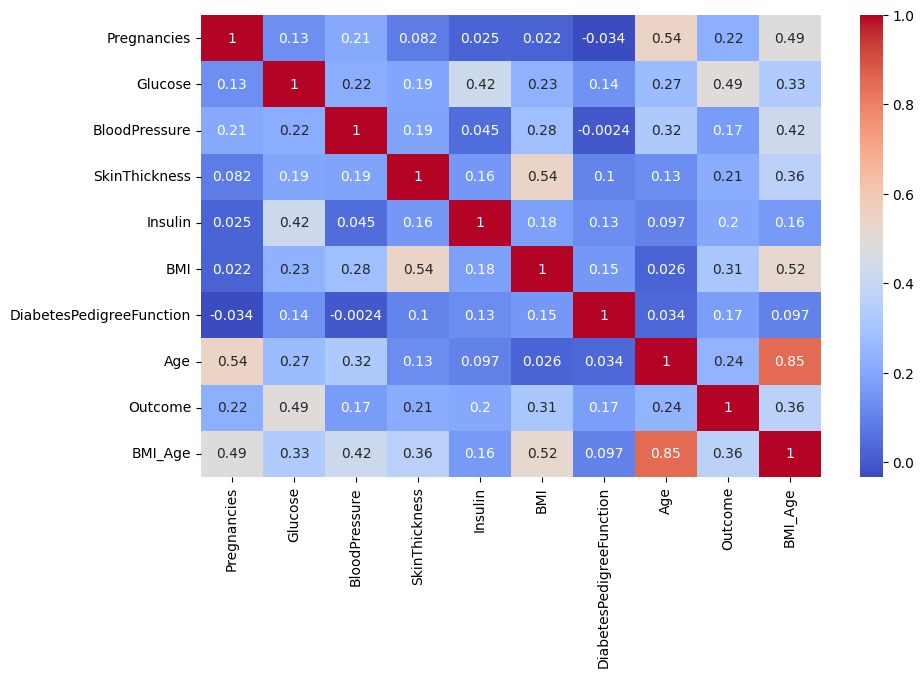

In [81]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [82]:
X =df.drop(columns=['Outcome'])
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  BMI_Age  
0                       0.627   50   1680.0  
1                  

In [83]:
y = df['Outcome']

In [84]:
# Print count of remaining 0s in each column
print((df == 0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
BMI_Age                       0
dtype: int64


In [85]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import PowerTransformer
import joblib

In [87]:
X_train , X_test,y_train , y_test = train_test_split(X,y,test_size = 0.2, random_state = 0,stratify=y)

In [88]:
#scaling using the power transform
scaler = PowerTransformer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
#Save the scaler
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

## Hyperparameter Tuning BEFORE Training

In [90]:
#parameter tuning
param_grid = {
    'max_depth': [3,5,7,9],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1, 3, 5],
    'criterion' : ['gini', 'entropy']
}

In [91]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [94]:
# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")
# Best model
best_dt_model = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [95]:
epochs = 20 
train_acc = []
test_acc= []    

for epoch in range(1,epochs+1):
    best_dt_model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, best_dt_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, best_dt_model.predict(X_test))
    
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)
    
    print(f"Epoch {epoch}: Train Acc = {train_accuracy:.4f}, Test Acc = {test_accuracy:.4f}")

    
    

Epoch 1: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 2: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 3: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 4: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 5: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 6: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 7: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 8: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 9: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 10: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 11: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 12: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 13: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 14: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 15: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 16: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 17: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 18: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 19: Train Acc = 0.7671, Test Acc = 0.7922
Epoch 20: Train Acc = 0.7671, Test Acc = 0.7922


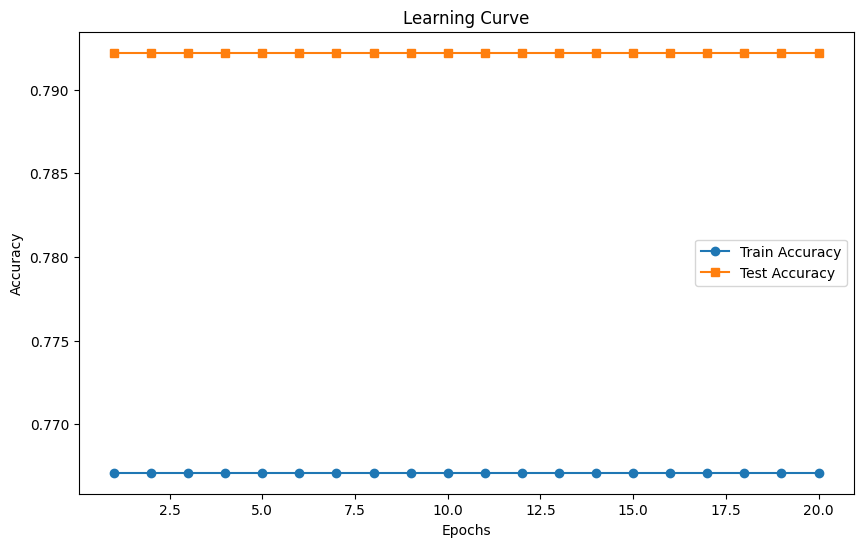

In [96]:
plt.figure(figsize=(10, 6))
plt.plot(range(1,epochs+1),train_acc, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), test_acc, label='Test Accuracy', marker='s')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

## Model Evaluation

In [97]:
y_pred = best_dt_model.predict(X_test)

In [98]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7922


In [99]:
# Classification Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



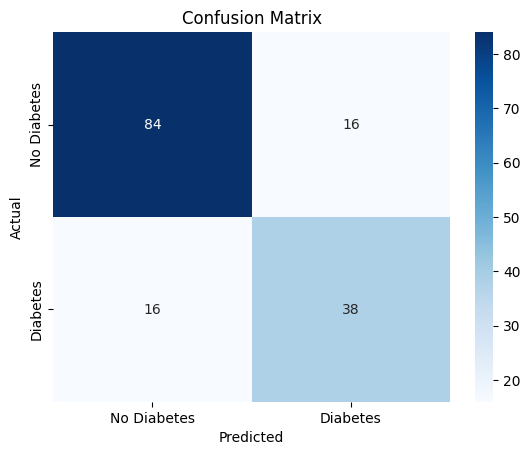

In [103]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

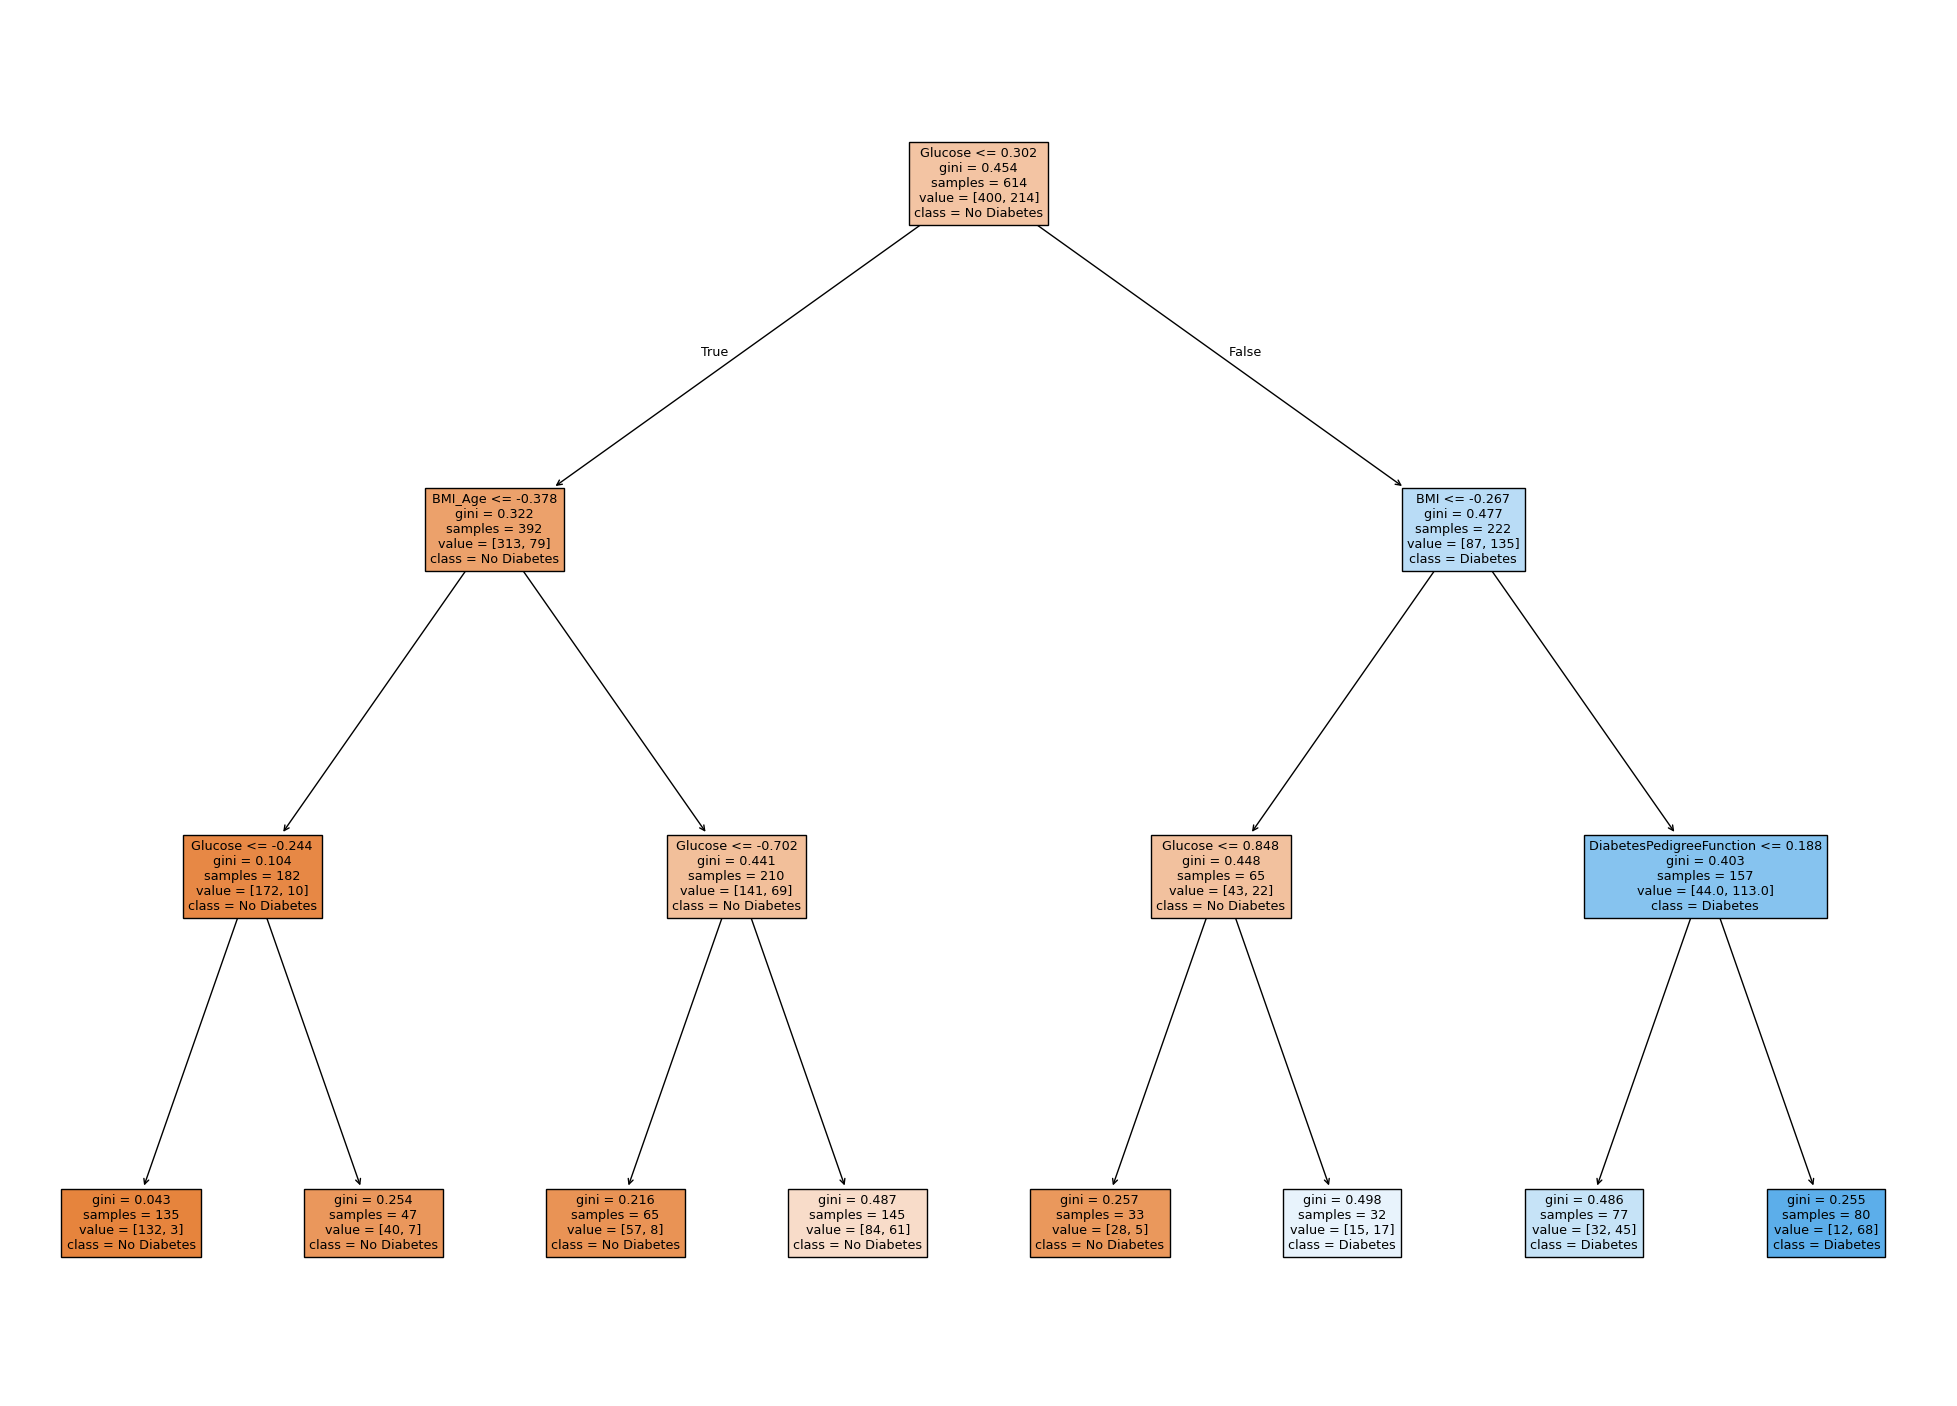

In [105]:
plt.figure(figsize=(25, 18))
plot_tree(best_dt_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()


In [106]:
# Save trained model
joblib.dump(best_dt_model, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [107]:
# Load model for inference
loaded_model = joblib.load('diabetes_model.pkl')
print("Model loaded successfully!")

Model loaded successfully!
